<img src="https://images.ctfassets.net/wrfb3hbaoyr0/53u5lL1hAQG4YmeagaKC6I/e871471524966764eb7a3456eef83591/hydrant_16-9.gif">

<h2>Description of the data</h2>
<br>

__Context:__
>_Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019._

__Content:__
>_This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions._

__Acknowledgements:__
>_`This public dataset is part of Airbnb, and the original source can be found on this <a href='http://insideairbnb.com/'>website</a>`_


__Inspiration__

>What can we learn about different hosts and areas?<br>
>What can we learn from predictions? (ex: locations, prices, reviews, etc)<br>
>Which hosts are the busiest and why?<br>
>Is there any noticeable difference of traffic among different areas and what could be the reason for it?<br>

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud
# from sklearn.preprocessing import OneHotEncoder
# import plotly.express as px
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import tree
# from sklearn.metrics import classification_report
# from sklearn.metrics import auc
# from sklearn.metrics import plot_roc_curve
# from sklearn.model_selection import StratifiedKFold
# import array
# import warnings
# from pylab import rcParams
# from scipy.stats import f_oneway
# from scipy.stats import ttest_ind
# import statsmodels.api as sm
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn import metrics
# from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
ori_new_york_df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
new_york_df = ori_new_york_df

In [5]:
#Printing the dataframe
new_york_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#printing the columns
new_york_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
type(new_york_df['last_review'][0])

str

In [8]:
new_york_df['last_review'] = pd.to_datetime(new_york_df['last_review'])

In [9]:
type(new_york_df['last_review'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#breakdown 'last_review' column into day,month and year
new_york_df['last_review_day'] = new_york_df['last_review'].dt.day
new_york_df['last_review_month'] = new_york_df['last_review'].dt.month
new_york_df['last_review_year'] = new_york_df['last_review'].dt.day

In [11]:
new_york_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0,5.0,21.0


In [12]:
# we noted that the room_type is only of 3 particular types.
#Return a Series containing counts of unique values of room_types
new_york_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:ylabel='room_type'>

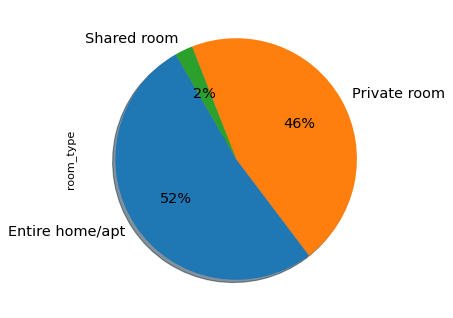

In [13]:
fig = plt.figure(figsize=(5,5), dpi=80)
new_york_df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=120, fontsize=13, shadow=True)

In [14]:
import folium
from folium.plugins import HeatMap

m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(new_york_df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

<b>DROP DUPLICATE ROWS IF ANY</b>

In [15]:
new_york_df.duplicated().sum()

0

In [16]:
#To remove duplicate rows(i know there isn't any)
new_york_df.drop_duplicates(inplace=True)

In [17]:
new_york_df.shape

(48895, 19)

In [18]:
#checking the descriptive statistics of data
new_york_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,38843.000000,38843.000000,38843.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,15.788276,6.173571,15.788276
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,9.882267,2.532065,9.882267
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,6.000000,5.000000,6.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,17.000000,6.000000,17.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,24.000000,7.000000,24.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,31.000000,12.000000,31.000000


In [19]:
new_york_df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [20]:
#shape of data
new_york_df.shape

(48895, 19)

In [21]:
#check the count of unique values in columns which would help us differetiate numeracal data with categorical data
new_york_df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
last_review_day                      31
last_review_month                    12
last_review_year                     31
dtype: int64

In [22]:
type(new_york_df.nunique())

pandas.core.series.Series

In [23]:
#Filtering out the categorical data
ny_unique = new_york_df.nunique()
ny_unique[ny_unique<20]

neighbourhood_group     5
room_type               3
last_review_month      12
dtype: int64

In [24]:
#Checking info of data
new_york_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [25]:
#gruop by datatype as int64, float64 and object
ny_dtypes = new_york_df.dtypes


In [26]:
#Swapped index with values and vice versa as we need to use group by obe int64,float64and object column
#and then convert it to dataframe
df = pd.Series(ny_dtypes.index,index=ny_dtypes.values).groupby(level=0).head().to_frame(name="colm_names")
df.index.name = 'dtypes'
df

,colm_names
dtypes,
int64,id
object,name
int64,host_id
object,host_name
object,neighbourhood_group
object,neighbourhood
float64,latitude
float64,longitude
object,room_type


In [27]:
df.loc['int64']

,colm_names
dtypes,
int64,id
int64,host_id
int64,price
int64,minimum_nights
int64,number_of_reviews


In [28]:
df.loc['float64']

,colm_names
dtypes,
float64,latitude
float64,longitude
float64,reviews_per_month
float64,last_review_day
float64,last_review_month


In [29]:
df.loc['object']

,colm_names
dtypes,
object,name
object,host_name
object,neighbourhood_group
object,neighbourhood
object,room_type


In [30]:
df.colm_names.unique()

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'last_review_day', 'last_review_month'],
      dtype=object)

In [31]:
#check null(missing) values count in each column
new_york_df.isnull().sum().sort_values(ascending=False)

last_review_year                  10052
last_review_month                 10052
last_review_day                   10052
reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
number_of_reviews                     0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [32]:
#Print names of all the coulumns with missing values and the count of missing values
ny_null_count = new_york_df.isnull().sum()
ny_null_count[ny_null_count != 0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
last_review_day      10052
last_review_month    10052
last_review_year     10052
dtype: int64

In [33]:
#Calculate the % of missing data in the above columns
ny_null_count[ny_null_count != 0] * (100 / ori_new_york_df.shape[0])

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
last_review_day      20.558339
last_review_month    20.558339
last_review_year     20.558339
dtype: float64

In [34]:
#Print all the rows with missing values in name
new_york_df[new_york_df.name.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362,NaN,NaN,NaN
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341,8.0,6.0,8.0
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0,1.0,1.0,1.0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0,2.0,1.0,2.0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,NaN,1,0,NaN,NaN,NaN


In [35]:
#Drop rows of all the values are missing
new_york_df.dropna(how = 'all',inplace=True)

In [36]:
new_york_df.shape

(48895, 19)

In [37]:
new_york_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,19.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,21.0,5.0,21.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5.0,7.0,5.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,19.0,11.0,19.0


<b>DROP IRRELEVANT COLUMNS</b>

In [38]:
new_york_df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)

In [39]:
new_york_df[['number_of_reviews','reviews_per_month']][new_york_df['reviews_per_month'].isnull()]

,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN
...,...,...
48890,0,NaN
48891,0,NaN
48892,0,NaN
48893,0,NaN


In [40]:
#As you can see above 'NaN' in reviews per month basically means 0
#so replace NaN with 0
new_york_df['reviews_per_month'].fillna(0,inplace=True)

In [41]:
new_york_df.loc[48894,'reviews_per_month']

0.0

In [42]:
new_york_df.reviews_per_month.isnull().sum()

0

In [43]:
new_york_df.isnull().sum().sort_values(ascending=False)

last_review_day                   10052
last_review_month                 10052
last_review_year                  10052
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<b>REMOVE ROWS WITH ANY MISSING VALUE</b>

In [44]:
new_york_df.dropna(how='any',axis=0,inplace=True)

In [45]:
new_york_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,19.0,10.0,19.0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0,5.0,21.0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5.0,7.0,5.0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,19.0,11.0,19.0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,22.0,6.0,22.0


In [46]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
#Plot a correlation matrix
corr_var = new_york_df.corr()
corr_var

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
host_id,1.000000,0.012946,0.141095,0.006269,-0.051693,-0.141819,0.296417,0.149412,0.155082,-0.014745,-0.030284,-0.014745
latitude,0.012946,1.000000,0.088152,0.031318,0.024808,-0.008746,-0.010142,0.004326,-0.022228,-0.000055,-0.002245,-0.000055
longitude,0.141095,0.088152,1.000000,-0.155361,-0.055418,0.054681,0.145948,-0.093325,0.102540,-0.013446,0.000772,-0.013446
price,0.006269,0.031318,-0.155361,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078234,-0.007227,0.003668,-0.007227
minimum_nights,-0.051693,0.024808,-0.055418,0.025506,1.000000,-0.069368,-0.121702,0.073479,0.101686,0.003190,-0.013352,0.003190
number_of_reviews,-0.141819,-0.008746,0.054681,-0.035938,-0.069368,1.000000,0.549868,-0.059784,0.193557,0.025760,-0.005364,0.025760
reviews_per_month,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,-0.020864,0.003139,-0.020864
calculated_host_listings_count,0.149412,0.004326,-0.093325,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182911,0.015008,-0.026610,0.015008
availability_365,0.155082,-0.022228,0.102540,0.078234,0.101686,0.193557,0.185791,0.182911,1.000000,0.005710,-0.034613,0.005710
last_review_day,-0.014745,-0.000055,-0.013446,-0.007227,0.003190,0.025760,-0.020864,0.015008,0.005710,1.000000,0.084473,1.000000


<AxesSubplot:>

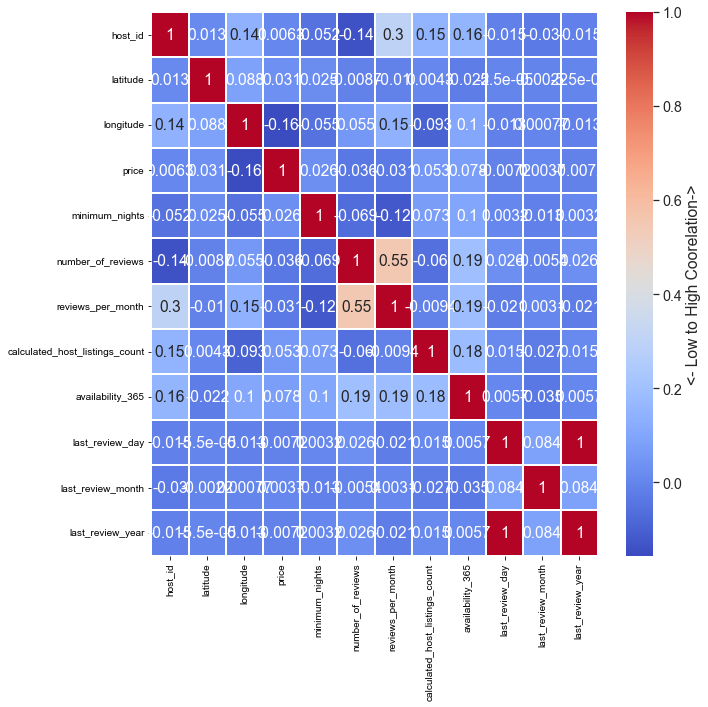

In [47]:
#Creating heatmap for visualizing correlation
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.set(font_scale=1.3)
sns.heatmap(new_york_df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2,cbar_kws={'label': '<- Low to High Coorelation->'})

Text(0.5, 1.0, 'COUNT OF AIRBNB SERVICES IN EACH NEIGHBOURHOOD')

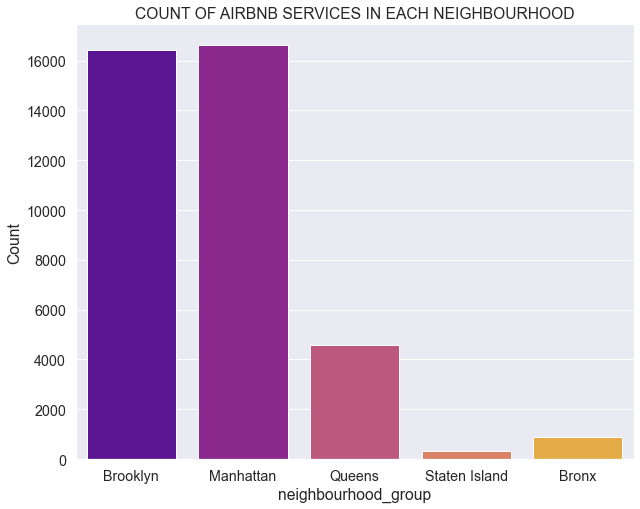

In [48]:
#See which neighbourhood got most airbnb services
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot('neighbourhood_group', data=new_york_df, palette="plasma")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")
plt.title("COUNT OF AIRBNB SERVICES IN EACH NEIGHBOURHOOD")

In [49]:
#See which neighbourhood is more/least expensive(mean)
ng_price_mean = new_york_df.groupby('neighbourhood_group').price.mean().to_frame()
ng_price_mean

,price
neighbourhood_group,
Bronx,79.553653
Brooklyn,121.448714
Manhattan,180.052489
Queens,95.762571
Staten Island,89.964968


In [50]:
ng_price_mean.reset_index(inplace=True)
ng_price_mean

,neighbourhood_group,price
0,Bronx,79.553653
1,Brooklyn,121.448714
2,Manhattan,180.052489
3,Queens,95.762571
4,Staten Island,89.964968


Text(0.5, 1.0, 'Mean Price of each group')

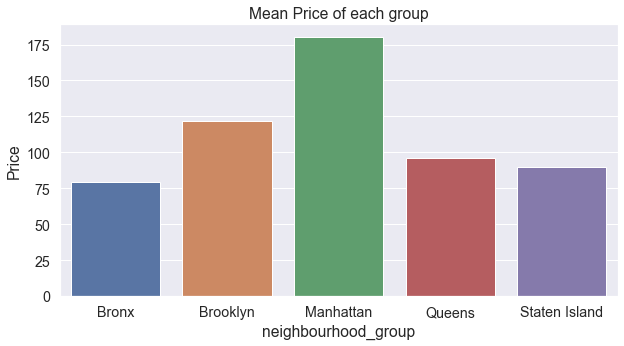

In [51]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='neighbourhood_group', y='price', data=ng_price_mean);
plt.xlabel("neighbourhood_group")
plt.ylabel("Price")
plt.title("Mean Price of each group")

Text(0.5, 1.0, 'Mean Price of each room type')

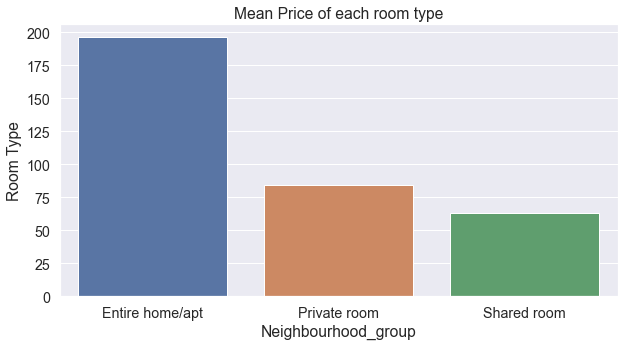

In [52]:
#See which room_type is more/least expensive(mean)
ny_roomtype_mean = new_york_df.groupby('room_type').price.mean().to_frame()
ny_roomtype_mean.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='room_type', y='price', data=ny_roomtype_mean);
plt.xlabel("Neighbourhood_group")
plt.ylabel("Room Type")
plt.title("Mean Price of each room type")

<b>Relation between neighbourgroup and Availability of Room</b>

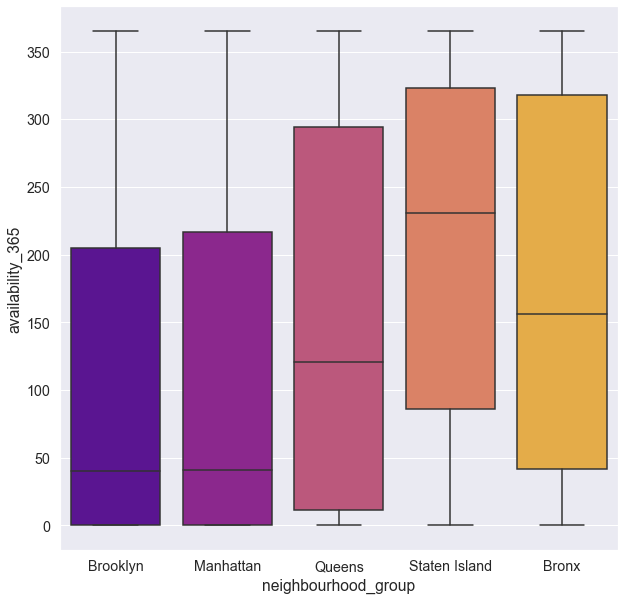

In [53]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=new_york_df, x='neighbourhood_group',y='availability_365',palette='plasma')

<b>Map of Neighbourhood group</b>

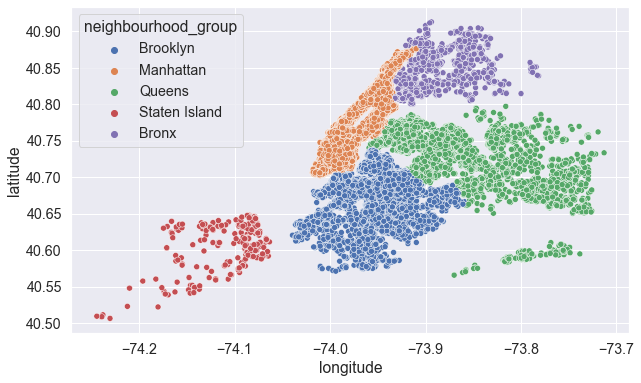

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(new_york_df.longitude,new_york_df.latitude,hue=new_york_df.neighbourhood_group)
plt.ioff()

<b>Map of roomtype</b>

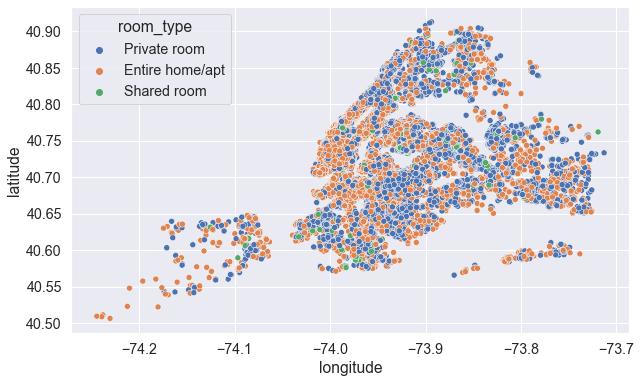

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(new_york_df.longitude,new_york_df.latitude,hue=new_york_df.room_type)
plt.ioff()

In [56]:
new_york_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,19.0,10.0,19.0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,21.0,5.0,21.0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5.0,7.0,5.0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,19.0,11.0,19.0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,22.0,6.0,22.0


<b>Map of availability</b>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

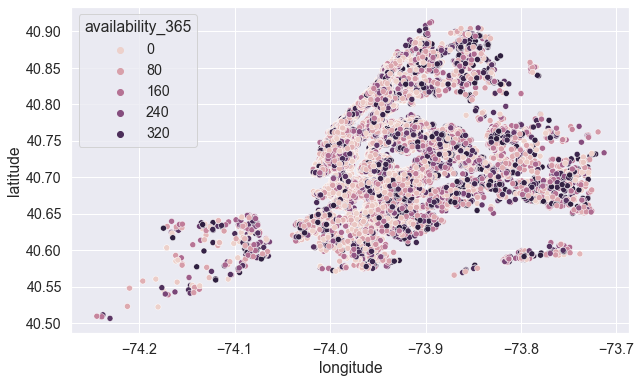

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(new_york_df.longitude,new_york_df.latitude,hue=new_york_df.availability_365)

<b>Top 10 most expensive neighbourhood in terms of average price</b>

In [58]:
exp_ng_pivot = pd.pivot_table(new_york_df, values = 'price', index = 'neighbourhood',
               aggfunc ='mean')

<AxesSubplot:xlabel='neighbourhood'>

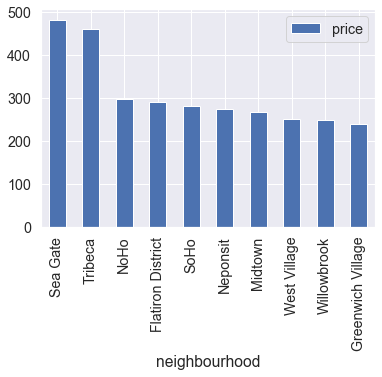

In [59]:
exp_ng_pivot.sort_values('price',ascending=False).head(10).plot.bar()

<b>Top 10 neighbourhood has most least reviews_per_month.</b>

In [60]:
pd.pivot_table(new_york_df,values='reviews_per_month',index='neighbourhood',
               aggfunc='count').sort_values('reviews_per_month',ascending=True).head(10)

,reviews_per_month
neighbourhood,
Willowbrook,1
Richmondtown,1
Rossville,1
Castleton Corners,2
West Farms,2
Howland Hook,2
Holliswood,2
Eltingville,2
Silver Lake,2


<H2>REGRESSION</H2>

In [61]:
#drop columns
new_york_df.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'],
                               axis=1,inplace=True)
new_york_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,Brooklyn,Private room,149,1,6,365,19.0,10.0,19.0
1,Manhattan,Entire home/apt,225,1,2,355,21.0,5.0,21.0
3,Brooklyn,Entire home/apt,89,1,1,194,5.0,7.0,5.0
4,Manhattan,Entire home/apt,80,10,1,0,19.0,11.0,19.0
5,Manhattan,Entire home/apt,200,3,1,129,22.0,6.0,22.0


__LABEL ENCODING THE CATEGORICAL COLUMNS__

In [62]:
from sklearn.preprocessing import LabelEncoder
cat_encoder = LabelEncoder()

In [63]:
cat_encoder.fit(new_york_df['room_type'])
new_york_df['room_type'] = cat_encoder.transform(new_york_df['room_type'])

In [64]:
new_york_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,Brooklyn,1,149,1,6,365,19.0,10.0,19.0
1,Manhattan,0,225,1,2,355,21.0,5.0,21.0
3,Brooklyn,0,89,1,1,194,5.0,7.0,5.0
4,Manhattan,0,80,10,1,0,19.0,11.0,19.0
5,Manhattan,0,200,3,1,129,22.0,6.0,22.0


In [65]:
cat_encoder.fit(new_york_df['neighbourhood_group'])
new_york_df['neighbourhood_group'] = cat_encoder.transform(new_york_df['neighbourhood_group'])

In [66]:
new_york_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year
0,1,1,149,1,6,365,19.0,10.0,19.0
1,2,0,225,1,2,355,21.0,5.0,21.0
3,1,0,89,1,1,194,5.0,7.0,5.0
4,2,0,80,10,1,0,19.0,11.0,19.0
5,2,0,200,3,1,129,22.0,6.0,22.0


In [67]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [68]:
#differentiating dependent and independent variables
ind_var = new_york_df.loc[:,['neighbourhood_group','room_type','minimum_nights','calculated_host_listings_count','availability_365']]
d_var = new_york_df.loc[:,'price']

In [69]:
ind_var.head(3)

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,1,6,365
1,2,0,1,2,355
3,1,0,1,1,194


In [70]:
d_var.head(3)

0    149
1    225
3     89
Name: price, dtype: int64

__Splitting data into train and test models__

In [71]:
#(actually this should be done as soon as u read your datasheet and analysis should 
#only be done on train set and not test set)
X_train,X_test,y_train,y_test = train_test_split(ind_var,d_var,test_size=0.1,random_state=353)#(10% of data is pushed into test set)

In [72]:
X_test.shape

(3885, 5)

In [73]:
X_train.shape

(34958, 5)

__LINEAR REGRESSION__

(Also known as line of least square regression)
>eq : y = b1.X + b0 (positive slope)(Diagram below has positive slope)<br>
>eq : y = -b1.X + b0 (negative slope)<br>

y -> dependent variable<br>
X -> independent variable<br>
b1 -> slope<br>
b0 -> intercept<br>

b1 = r(stdev(X)/stdev(y))
r-> correlation coeff between X & Y

The slope of the regression line predicts the changes in y when X increases by one unit

Result : so whenever X increases by one unit, y increases/decreases by b1(slope) unit

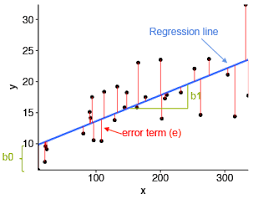

In [74]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

__R-Squared__
(contains no. between 0 to 1)<br>
1. It is the measure of how close each data points fits to the regression line
2. It tells us how well the regression line predicts values
3. If the r² is closer to 1 then regression line accuracy of prediction will be good
4. If the r² is closer to 0 then regression line accuracy of prediction will be bad
5. R-Square also tells us the percentage of variation in 'y' that is accounted for by its regression on 'X'
6. For example, X=study time , y=CGPA : here we know that if X increases, y would increase as well. Let's assume r-square of of these varaibles is 88%. Which means 88% of the variation in CGPA is accounted for by its regression on study time 

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09345365488523483

In [76]:
#r2 score is too worse which means linear regression wont be able to predict at all

__Decision Tree Regression__

>https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/#:~:text=Decision%20Tree%20Splitting%20Method%20%231,is%20split%20into%20child%20nodes.

<h3>Decision Tree Classifier</h3>

1. The inner and roots contain conditions for the splits and the leaf contains the class (group) which is used for prediction.
2. The algorithm chooses splits(conditions) on its own which results in better information gain
3. Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations.
    1. It determines how a decision tree chooses to split data.
    2. The higher the entropy, the worsen the prediction becomes
    3. It is used to calculate information gain (helpful for spliting)
    
4. The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
5. Constructing a decision tree is all about finding attribute that returns the highest information gain
6. Decision tree is greedy algo so it chooses the best current split which means it doesn't backtrack to change previous splits to make them efficient
7. when a new value is pushed inside decision tree to make prediction,it sees in which leaf node(class/group) the data reaches and then it takes the mean of those datapoints inside that leaf node and that results as prediction

<hr style="border: 1px solid;">


<h3>Decision Tree Regressor</h3>

1. The nodes are splited by computing variance reduction
2. Higher value is variance means higher impurity
3. it makes sense because variance is a measure of how data points differ from the mean.
4. So in order to have a homogenous/pure leaf node, the data should have lower variance

In [77]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(ind_var,d_var,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_pred=DTree.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09928356651687475

In [79]:
#R2 score of decision tree is still less so it wont work as well